In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving telco_customer_churn.csv to telco_customer_churn (3).csv


In [40]:
data = pd.read_csv('telco_customer_churn.csv')
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0           1  Female              0     Yes         No       1          Yes   
1           2    Male              0     Yes         No      34          Yes   
2           3  Female              0      No         No       2          Yes   
3           4    Male              0     Yes        Yes      45          Yes   
4           5  Female              1     Yes        Yes       5          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No     Fiber optic            Yes  ...              Yes   
1           Yes     Fiber optic             No  ...               No   
2            No     Fiber optic             No  ...               No   
3           Yes             DSL            Yes  ...              Yes   
4            No     Fiber optic            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

In [41]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7 non-null      int64  
 1   gender            7 non-null      object 
 2   SeniorCitizen     7 non-null      int64  
 3   Partner           7 non-null      object 
 4   Dependents        7 non-null      object 
 5   Tenure            7 non-null      int64  
 6   PhoneService      7 non-null      object 
 7   MultipleLines     7 non-null      object 
 8   InternetService   7 non-null      object 
 9   OnlineSecurity    7 non-null      object 
 10  OnlineBackup      7 non-null      object 
 11  DeviceProtection  7 non-null      object 
 12  TechSupport       7 non-null      object 
 13  StreamingTV       7 non-null      object 
 14  StreamingMovies   7 non-null      object 
 15  Contract          7 non-null      object 
 16  PaperlessBilling  7 non-null      

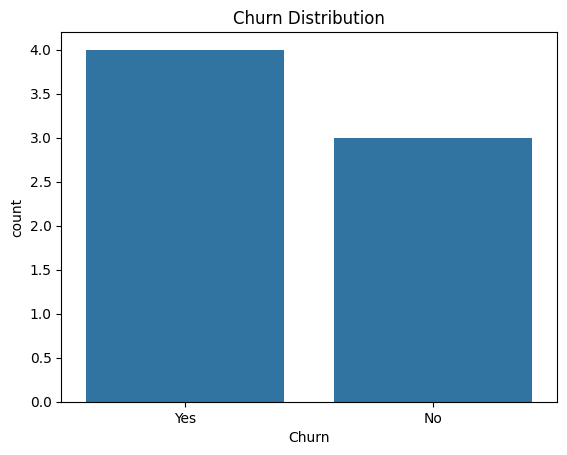

In [42]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


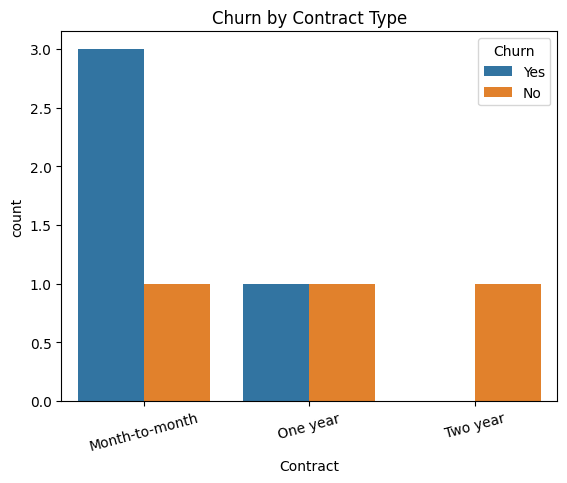

In [43]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xticks(rotation=15)
plt.show()

In [44]:
#Data Cleaning & Preprocessing

print("Missing values per column:\n")
print(data.isnull().sum())
print("\nCleaned DataFrame shape:", data.shape)
print(data.head())

Missing values per column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Cleaned DataFrame shape: (7, 21)
   customerID  gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0           1  Female              0     Yes         No       1          Yes   
1           2    Male              0     Yes         No      34          Yes   
2           3  Female              0      No         No       2          Yes   
3           4    Male              0     Yes        Yes      45          Yes   
4           5  Female              1     Yes        Yes       5

In [45]:
data = pd.get_dummies(data, drop_first=True)

# Preview the cleaned dataset
print(data.head())
print("\nShape after encoding:", data.shape)

   customerID  SeniorCitizen  Tenure  MonthlyCharges  TotalCharges  \
0           1              0       1           29.99         29.99   
1           2              0      34           56.95       1910.30   
2           3              0       2           53.85        108.15   
3           4              0      45           42.30       1902.45   
4           5              1       5           70.70        355.60   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False              True   
1         True         True           False              True   
2        False        False           False              True   
3         True         True            True              True   
4        False         True            True              True   

   MultipleLines_Yes  ...  DeviceProtection_Yes  TechSupport_Yes  \
0              False  ...                  True             True   
1               True  ...                 False     

In [46]:
print("\nAny missing values?\n", data.isnull().sum().sum())
print(data.columns.tolist())



Any missing values?
 0
['customerID', 'SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card', 'PaymentMethod_Electronic check', 'Churn_Yes']


In [47]:
X = data.drop(['Churn_Yes'], axis=1)
y = data['Churn_Yes']


In [48]:
# Remove rows where either X or y is NaN
X = X.dropna()
y = y.loc[X.index]  # align y with X after dropping

# Drop NaNs from y just in case
y = y.dropna()

print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())

NaNs in X: 0
NaNs in y: 0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [50]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)
X_encoded = pd.get_dummies(X, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Index([], dtype='object')


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Training samples: 5
Test samples: 2


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 1.0
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



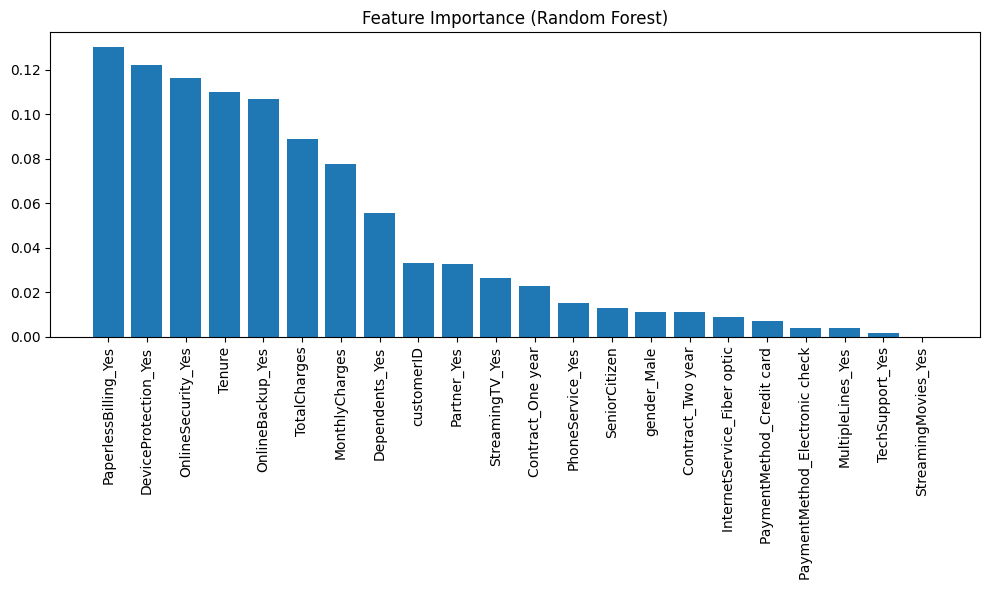

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [57]:
import pickle

# Save model and scaler
pickle.dump(rf_model, open("rf_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
